<a href="https://colab.research.google.com/github/fabyolaras/Customer-Churn-Prediction/blob/main/Fix_of_FGA_Binar_Challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Statistical Descriptive

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Number of customers who churn: 598 , ( 14.070588235294117 % )
Number of customers who not churn: 3652 , ( 85.92941176470589 % )


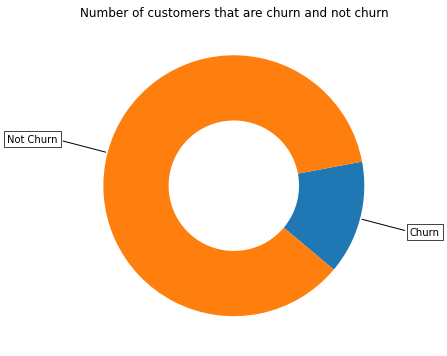

In [ ]:
y_value_counts = df_train['churn'].value_counts()
print("Number of customers who churn:", y_value_counts[1],", (",(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")
print("Number of customers who not churn:", y_value_counts[0],", (",(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Churn", "Not Churn"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of customers that are churn and not churn")

plt.show()

In [ ]:
categorical_train = []
for column in df_train.columns:
    if df_train[column].dtype == object:
        categorical_train.append(column)
        print(f"{column} : {df_train[column].unique()}")

state : ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code : ['area_code_415' 'area_code_408' 'area_code_510']
international_plan : ['no' 'yes']
voice_mail_plan : ['yes' 'no']
churn : ['no' 'yes']


In [ ]:
numerical= df_train.select_dtypes(include = 'number').columns
print(f'Numerical Columns:  {df_train[numerical].columns}')

Numerical Columns:  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


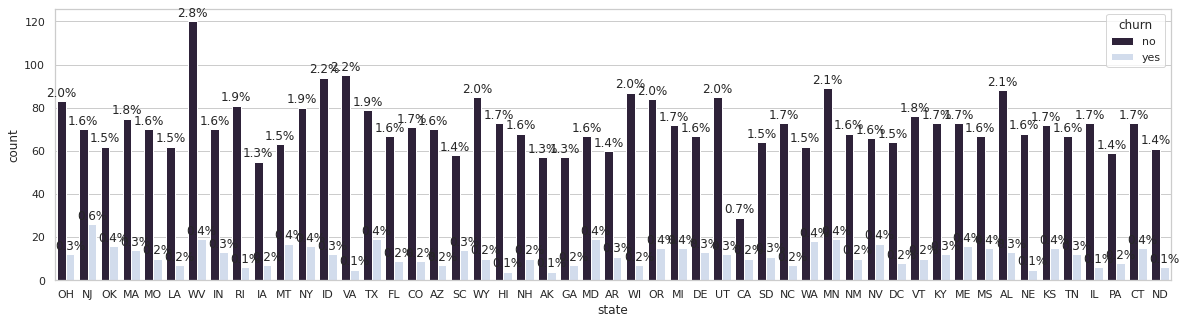

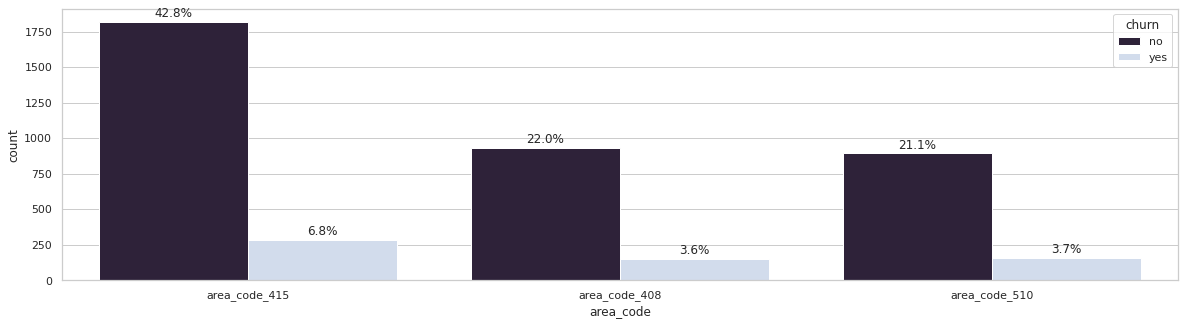

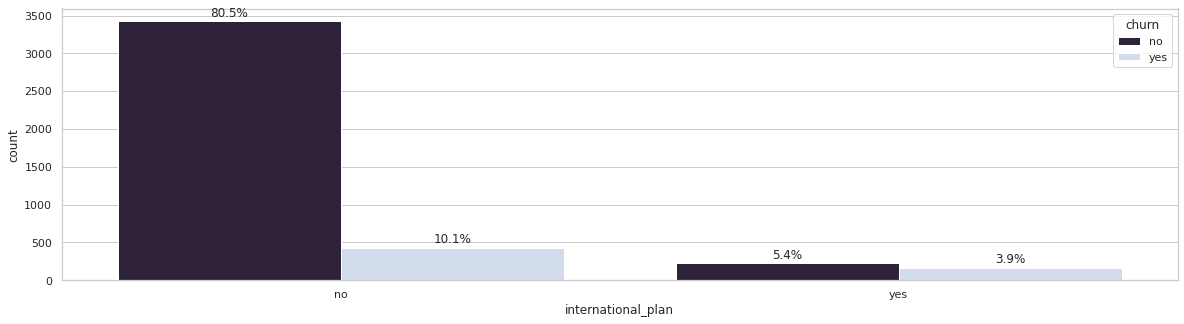

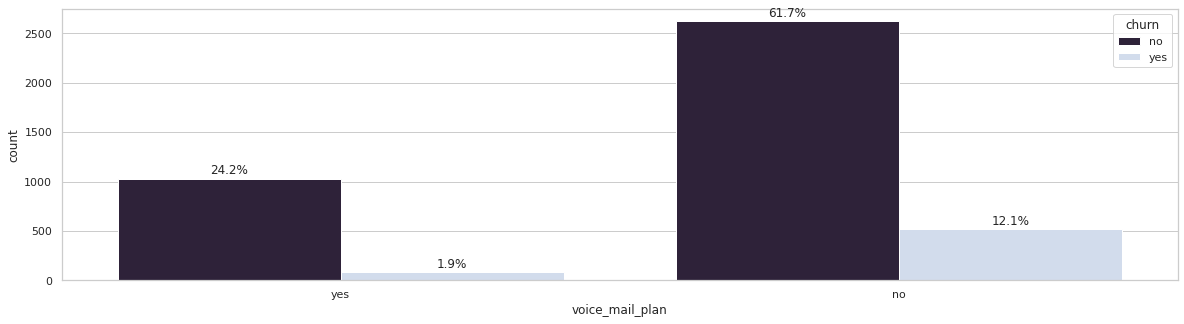

In [ ]:
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='center', xytext=(0, 8), textcoords='offset points')
        
categorical_train.remove('churn')
for feature in categorical_train:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df_train)
    ax = sns.countplot(x = df_train[feature], data = df_train, hue = df_train['churn'], palette = 'ch:start=0.3,rot=-.2_r')
    with_per(total, ax)
    plt.show()

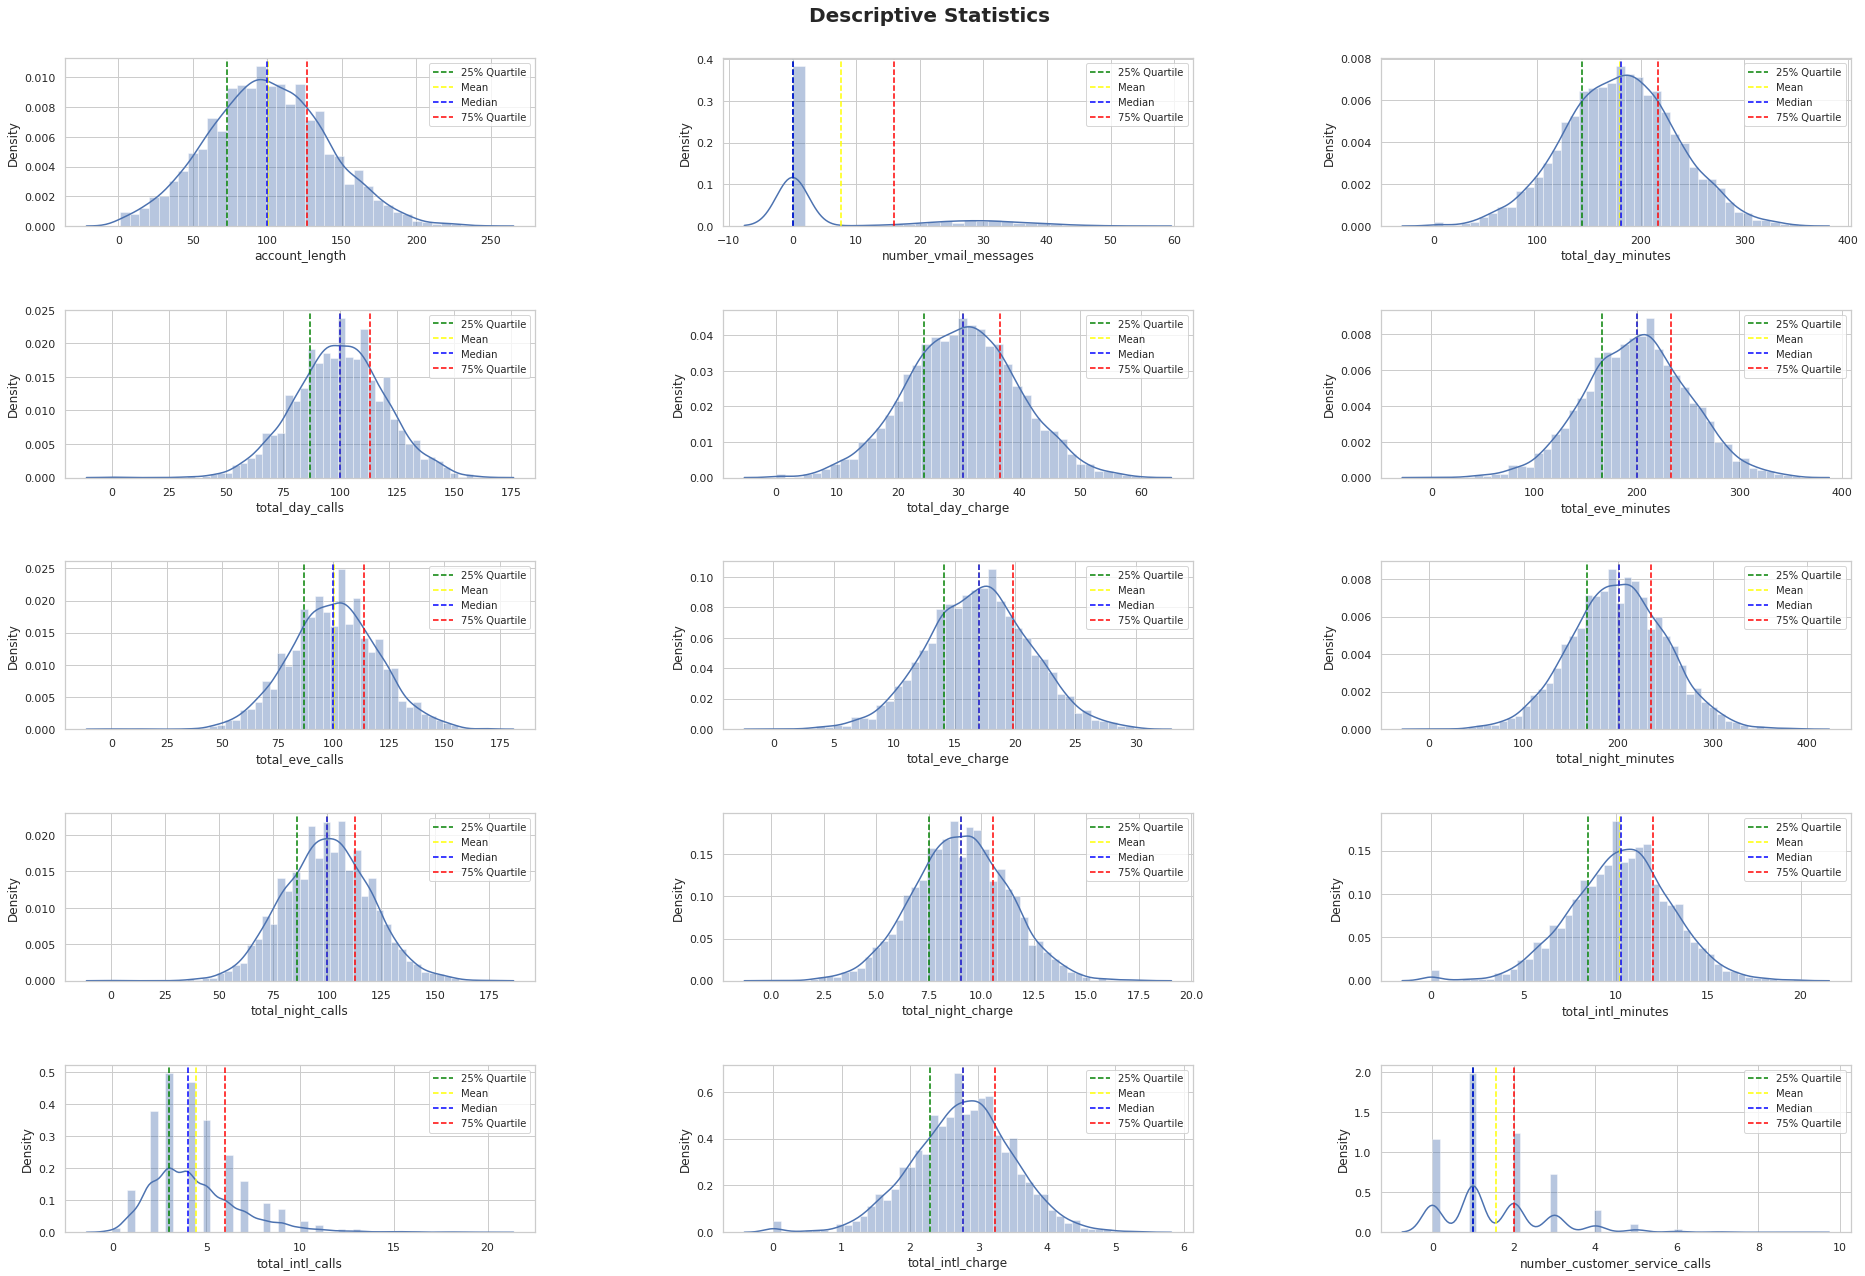

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Descriptive Statistics', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.95);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

for i,feature in enumerate(numerical):
    plots = fig.add_subplot(6, 3, i+1)
    plots = sns.distplot(df_train[feature]) 
    plots.axvline(df_train[feature].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    plots.axvline(df_train[feature].mean(),color='yellow',linestyle='--',label='Mean')
    plots.axvline(df_train[feature].median(),color='blue',linestyle='--',label='Median')
    plots.axvline(df_train[feature].quantile(q=0.75),color='red',linestyle='--',label='75% Quartile')
    plots.legend(fontsize=10)
    plt.xlabel(feature)
    plt.ylabel('Density')

- Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribution so we can covert into normal distribution in feature engineering step.
- Other than the obove features all look like a normal distribution.

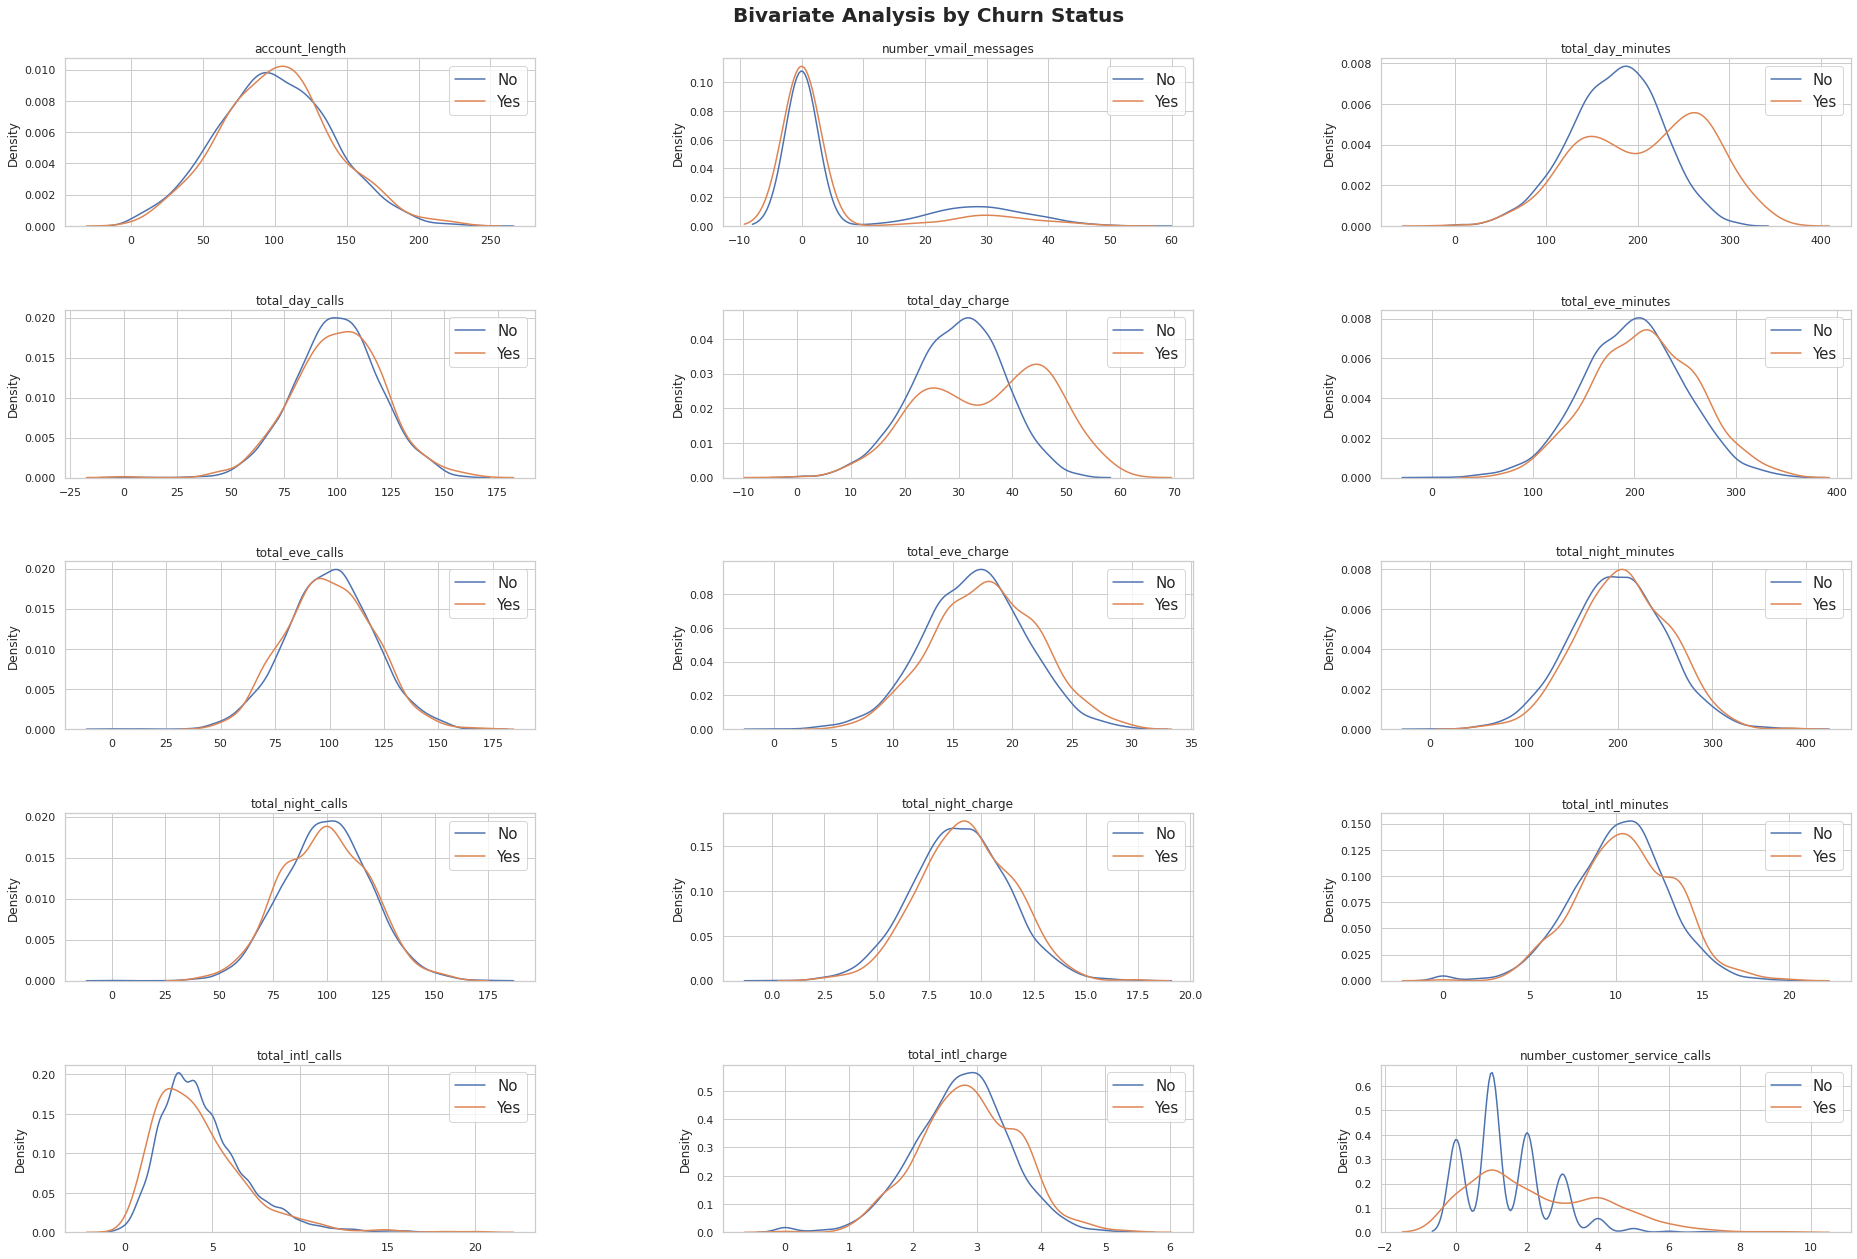

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis by Churn Status', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.95);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):
    a = fig.add_subplot(6, 3, i+1)
    sns.distplot(x =df_train[df_train['churn']=='no'][col], ax=a ,  hist =False)
    sns.distplot(x =df_train[df_train['churn']=='yes'][col] , ax=a , hist =False) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

# Data Pre-processing

##Data Cleaning

### Identify Missing Value

In [ ]:
df_train.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

###Identify Duplicate Value

In [ ]:
df_train.duplicated().any()

False

###Identify Outliers

In [ ]:
df_ch = df_train.copy()

In [ ]:
df_ch['churn'] = df_ch['churn'].map(dict(yes=1, no=0))

In [ ]:
df_out = df_ch.copy()

In [ ]:
def check_out(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  return outlier

In [ ]:
check_out(df_out[numerical]).sum()

account_length                    20
number_vmail_messages             86
total_day_minutes                 25
total_day_calls                   28
total_day_charge                  26
total_eve_minutes                 34
total_eve_calls                   24
total_eve_charge                  34
total_night_minutes               37
total_night_calls                 33
total_night_charge                37
total_intl_minutes                62
total_intl_calls                 100
total_intl_charge                 62
number_customer_service_calls    335
dtype: int64

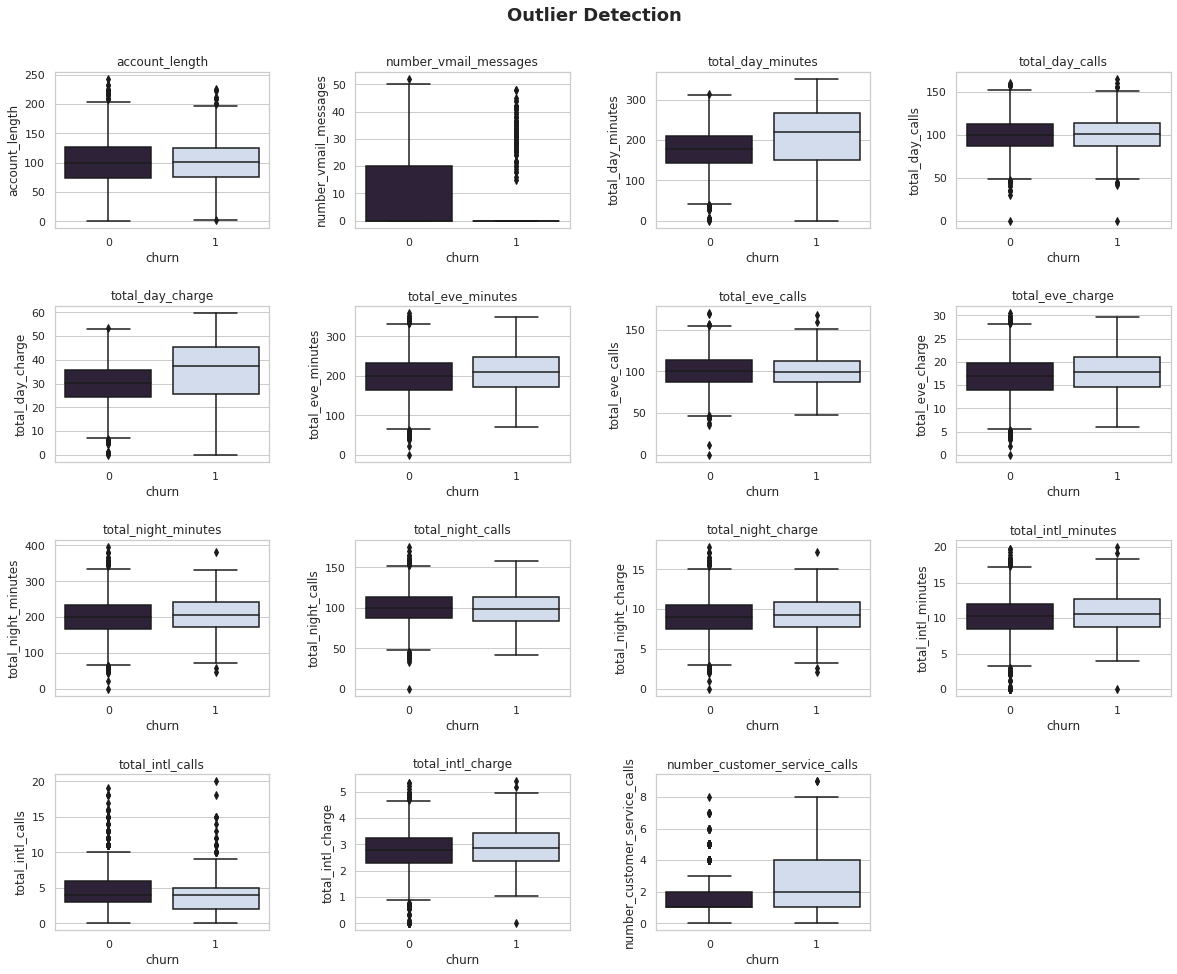

In [ ]:
fig = plt.figure(figsize=[20,15])
fig.suptitle('Outlier Detection', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, feature in enumerate(numerical):
    a = fig.add_subplot(4, 4, i+1)
    a=sns.boxplot(x = 'churn', y =feature, ax=a, data = df_out, palette = 'ch:start=0.3,rot=-.2_r')
    a.set_title(feature)

every features has a outliers so we need to remove the outliers.
outlies contains the some usefull information.
so we have to replace the outliers with some meaning full values. so we should replace the outliers with median values

###Remove Outliers

In [ ]:
def remove_outliers(df,labels):
    for label in labels:
        q1 = df[label].quantile(0.25)
        q3 = df[label].quantile(0.75)
        iqr = q3 - q1
        max_val = q3 + 1.5 * iqr
        min_val = q1 - 1.5 * iqr
        df[label] = np.where(df[label] > max_val, max_val, np.where(df[label] < min_val,min_val,df[label]))
        #df[label] = df[label].mask(df[label]< min_val, df[label].mean(),axis=0)
        #df[label] = df[label].mask(df[label]> max_val, df[label].mean(),axis=0)

    return df

In [ ]:
df_train_out = remove_outliers(df_out, numerical)

To make sure the outliers are removed

In [ ]:
check_out(df_train_out[numerical]).sum()

account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

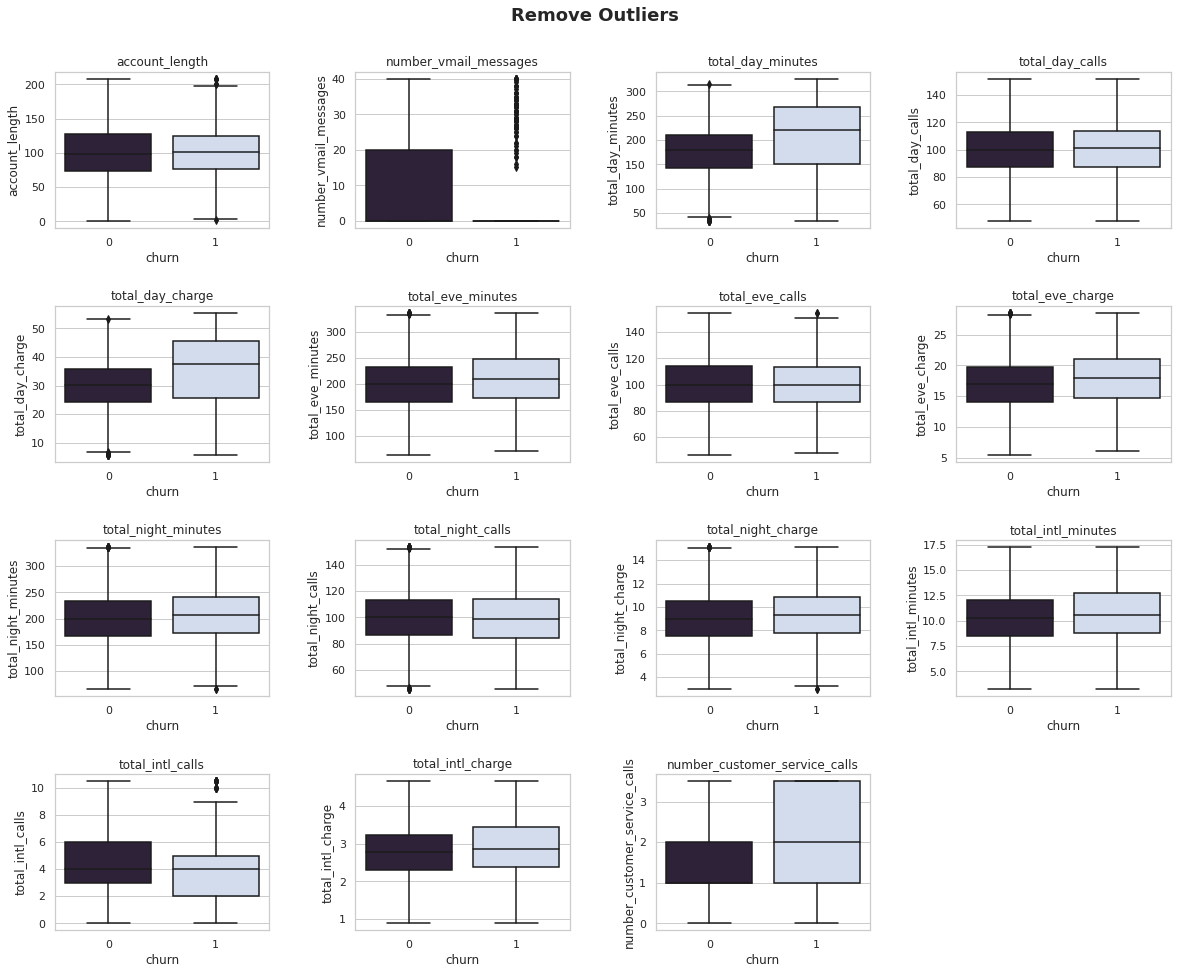

In [ ]:
fig = plt.figure(figsize=[20,15])
fig.suptitle('Remove Outliers', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, feature in enumerate(numerical):
    a = fig.add_subplot(4, 4, i+1)
    a=sns.boxplot(x = 'churn', y =feature, ax=a, data = df_train_out, palette = 'ch:start=0.3,rot=-.2_r')
    a.set_title(feature)

##Feature Engineering

In [ ]:
df_train_clean = df_train_out.copy() 

In [ ]:
#df_train_clean['churn'] = df_train_clean['churn'].map(dict(yes=1, no=0))

In [ ]:
def preprocess(df):
    df['total_nat_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_nat_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_nat_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

    df['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
    df['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)

    df.drop(columns=['state', 'area_code'], inplace=True)
    df.drop(columns=['account_length'] , axis=1 , inplace=True)
    df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
    df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
    df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)

    return df

In [ ]:
preprocess(df_train_clean).head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_nat_minutes,total_nat_calls,total_nat_charge
0,0,1,26.0,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


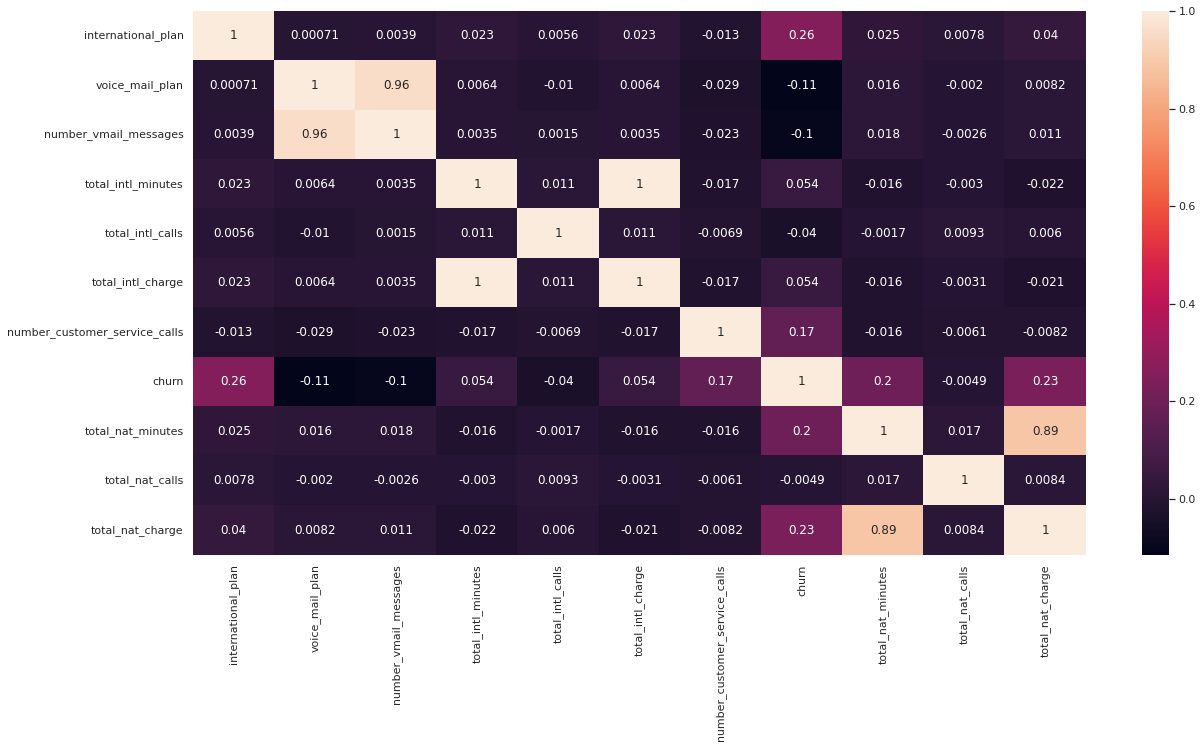

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_train_clean.corr(), annot=True)

- Based on this heatmap, we can see a very strong positive correlation between the variable **voice_mail_plan** and **number_vmail_messages** which is equal to 0.94. This means that the bigger the voice_mail_plan, the bigger the number_vmail_messages. 
- The variables **total_nat_minutes** and **total_nat_charge** also have a strong positive correlation, is equal to 0.89. Because when total_nat_minutes is large, the total_nat_charge will also get bigger.

##Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split 
x = df_train_clean.drop('churn',axis=1).values
y = df_train_clean.churn.values
# splitting tha data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(3400, 10) (850, 10)


##Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modeling

Here are some algorithms that will be tested to determine the best model:

* Logistic Regression
* Gaussian Naive Bayes
* Decision Tree
* Random Forest
* K-Nearest Neighbor
* Neural Network

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score, precision_score

##ML Function

In [ ]:
model_list = []
accuracy_list = []
precision_list = []
f1_score_list= [] 
roc_auc_list = []

In [ ]:
def ML (alg, name_model): #y_train_alg, y_test_alg):
  
  alg_model = alg().fit(x_train, y_train)
  print(alg_model)
  y_train_alg = alg_model.predict(x_train)
  y_test_alg = alg_model.predict(x_test)

  pred(x_train, y_train, alg_model, 'Training', name_model, y_train_alg)
  pred(x_test, y_test, alg_model, 'Testing', name_model, y_test_alg)

  accuracy, precision, f1_s, roc_auc_sc= round(accuracy_score(y_test , y_test_alg) , 3) , round(precision_score(y_test , y_test_alg) , 3) , round(f1_score(y_test , y_test_alg) , 3), round(roc_auc_score(y_test, y_test_alg),3)
  print(f'Test Accuracy Score is :{accuracy}')
  print(f'Test Precision Score is :{precision}')
  print(f'f1  Score is :{f1_s}')
  print(f'ROC AUC Score is :{roc_auc_sc}')
  model_list.append(name_model)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  f1_score_list.append(f1_s)
  roc_auc_list.append(roc_auc_sc)
  return(alg_model)

In [ ]:
def pred (x_data, y_data, alg_model, type, name_model, y_pred_alg):

  # print classification report
  print('\nClassification Report %s' % type, ' Model:')
  print(classification_report(y_data, y_pred_alg))

  # form confusion matrix as a dataFrame
  confusion_matrix_alg = pd.DataFrame((confusion_matrix(y_data, y_pred_alg)), ('Not Churn', 'Churn'),('Not Churn', 'Churn'))

  # plot confusion matrix
  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_alg, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

  plt.title('Confusion Matrix for %s Model \n%s '% (type,name_model),fontsize=18, color='black')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.show()

##Logistic Regression

LogisticRegression()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2931
           1       0.62      0.15      0.24       469

    accuracy                           0.87      3400
   macro avg       0.75      0.57      0.59      3400
weighted avg       0.84      0.87      0.83      3400



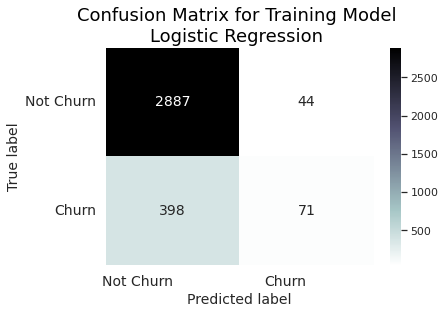


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       721
           1       0.76      0.22      0.35       129

    accuracy                           0.87       850
   macro avg       0.82      0.61      0.64       850
weighted avg       0.86      0.87      0.84       850



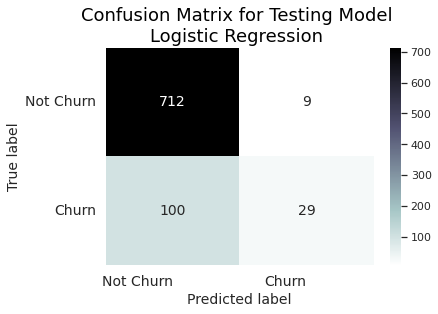

Test Accuracy Score is :0.872
Test Precision Score is :0.763
f1  Score is :0.347
ROC AUC Score is :0.606


In [ ]:
model_lr = ML(LogisticRegression, 'Logistic Regression')

##Gaussian Naive Bayes

GaussianNB()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2931
           1       0.57      0.51      0.54       469

    accuracy                           0.88      3400
   macro avg       0.75      0.72      0.73      3400
weighted avg       0.87      0.88      0.88      3400



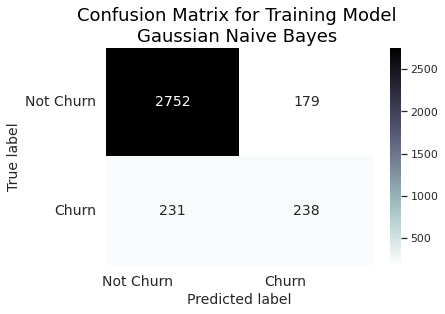


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       721
           1       0.64      0.53      0.58       129

    accuracy                           0.88       850
   macro avg       0.78      0.74      0.76       850
weighted avg       0.88      0.88      0.88       850



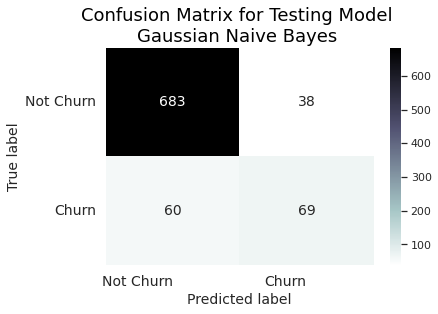

Test Accuracy Score is :0.885
Test Precision Score is :0.645
f1  Score is :0.585
ROC AUC Score is :0.741


In [ ]:
model_gnb = ML(GaussianNB, 'Gaussian Naive Bayes')

##Decission Tree

DecisionTreeClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



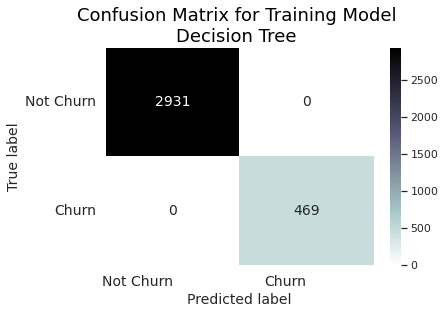


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.83      0.85      0.84       129

    accuracy                           0.95       850
   macro avg       0.90      0.91      0.91       850
weighted avg       0.95      0.95      0.95       850



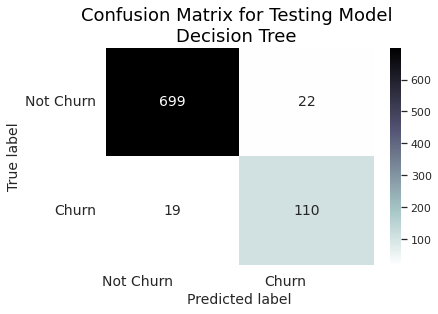

Test Accuracy Score is :0.952
Test Precision Score is :0.833
f1  Score is :0.843
ROC AUC Score is :0.911


In [ ]:
model_dt = ML(DecisionTreeClassifier, 'Decision Tree')

##Random Forest Classifier

RandomForestClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



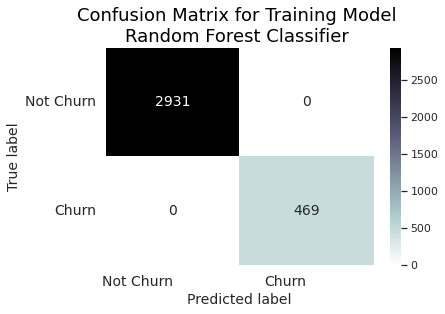


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       721
           1       0.97      0.87      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.93      0.95       850
weighted avg       0.98      0.98      0.98       850



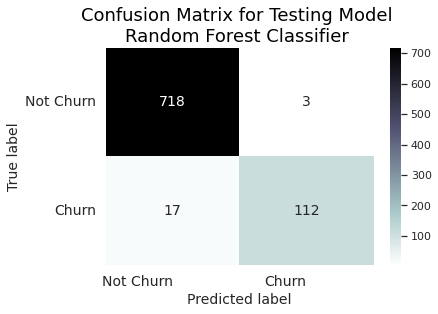

Test Accuracy Score is :0.976
Test Precision Score is :0.974
f1  Score is :0.918
ROC AUC Score is :0.932


In [ ]:
model_rf = ML(RandomForestClassifier, 'Random Forest Classifier')

##Support Vector Machine

SVC()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2931
           1       0.92      0.48      0.63       469

    accuracy                           0.92      3400
   macro avg       0.92      0.74      0.80      3400
weighted avg       0.92      0.92      0.91      3400



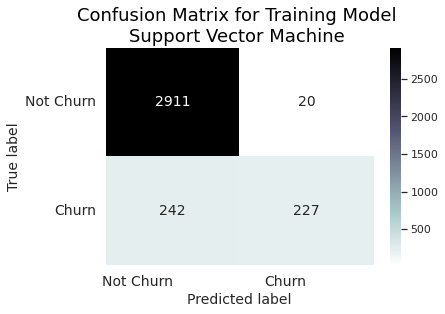


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       721
           1       0.93      0.54      0.69       129

    accuracy                           0.92       850
   macro avg       0.93      0.77      0.82       850
weighted avg       0.93      0.92      0.92       850



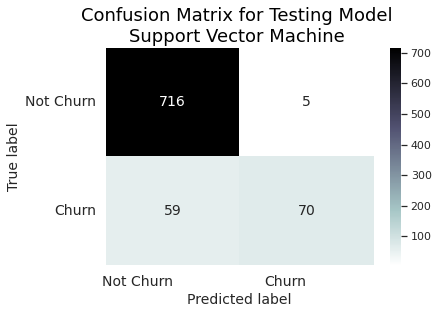

Test Accuracy Score is :0.925
Test Precision Score is :0.933
f1  Score is :0.686
ROC AUC Score is :0.768


In [ ]:
model_svm = ML(SVC, 'Support Vector Machine')

##Neural Network

MLPClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2931
           1       0.91      0.60      0.73       469

    accuracy                           0.94      3400
   macro avg       0.92      0.80      0.85      3400
weighted avg       0.94      0.94      0.93      3400



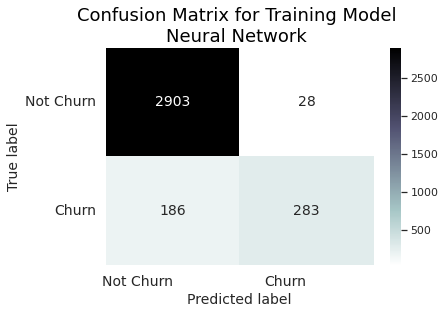


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       721
           1       0.89      0.63      0.74       129

    accuracy                           0.93       850
   macro avg       0.91      0.81      0.85       850
weighted avg       0.93      0.93      0.93       850



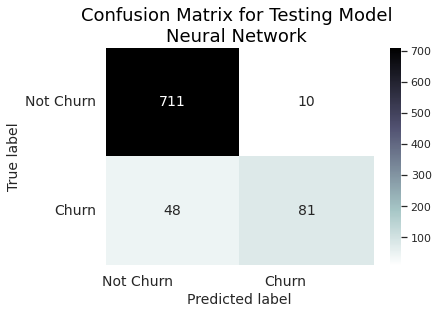

Test Accuracy Score is :0.932
Test Precision Score is :0.89
f1  Score is :0.736
ROC AUC Score is :0.807


In [ ]:
model_nn = ML(MLPClassifier, 'Neural Network')

##Model Summary

In [ ]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list,'f1_score':f1_score_list , 'ROC_AUC_score':roc_auc_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,ROC_AUC_score
3,Random Forest Classifier,0.976,0.974,0.918,0.932
2,Decision Tree,0.952,0.833,0.843,0.911
5,Neural Network,0.932,0.890,0.736,0.807
4,Support Vector Machine,0.925,0.933,0.686,0.768
1,Gaussian Naive Bayes,0.885,0.645,0.585,0.741
0,Logistic Regression,0.872,0.763,0.347,0.606


#Churn Preddiction

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_test_clean = df_test.copy()
testing = df_test_clean.drop('id', axis=1)

In [ ]:
preprocess(df_test_clean).head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge
0,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [ ]:
testing = df_test_clean.drop('id', axis=1)

In [ ]:
testing.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge
0,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [ ]:
predict = pd.Series(model_rf.predict(testing), name = 'churn').astype(int)
results = pd.concat([df_test_clean['id'], predict],axis = 1)
results['churn'].replace({0: 'no', 1: 'yes'}, inplace=True)
results.to_csv("predict application.csv", index = False)
results.head()

,id,churn
0,1,no
1,2,yes
2,3,yes
3,4,yes
4,5,yes
